## Layerization Block

The main idea of this block is, given a quantum circuit divide the circuit into subcircuits that has equal depth in order to characterize the entanglement of the subcircuits.  
We dont need the one layer (depth 1) subcircuit due to we cannot create entanglement with this layer.

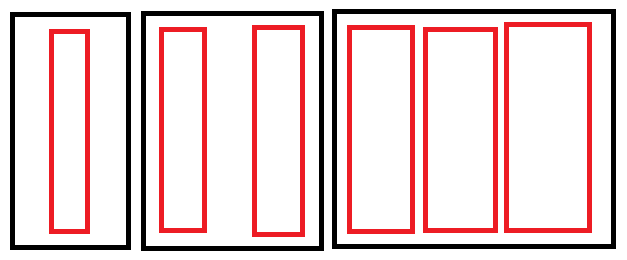

In [9]:
from qiskit import QuantumCircuit
import qiskit

In [10]:
def layerlization(qc : qiskit.QuantumCircuit, depth : int):
    """
    function that divide the quantum circuit into different circuits
    given the depth requirements.

    Input:
    qc : QuantumCircuit.
    depth: depth requirements.

    Output:
    circuits : list; list with all the subcircuits.
    
    """

    # Define the list to storage all the subcircuits.
    circuits = []

    qubit_num = qc.num_qubits
    # Define some auxiliars quantum circuits.
    qc_aux = QuantumCircuit(qubit_num, qubit_num)
    qc_add = QuantumCircuit(qubit_num, qubit_num)

    # Define the current layer.
    layer = 1
    # Define the iteration.
    iter = 0

    for gate in qc.data:


        iter += 1 
        # Add the quantum gate to the axiliar circuit.
        qc_add.append(gate)

        # Calculate the current depth to storage the information.
        # or to know about the last quantum gate to add.
        if qc_add.depth() == layer+depth or iter==len(qc.data):
            
            # Check if there is the last gate.
            if iter==len(qc.data) and depth != 1: 
                qc_aux.append(gate)

            # Add the quantum circuit.
            circuits.append(qc_aux)
            qc_aux = QuantumCircuit(qubit_num, qubit_num)
            qc_aux.append(gate)
            layer = layer + depth

            if(depth == 1 and iter==len(qc.data)):
                qc_aux = QuantumCircuit(qubit_num ,qubit_num)
                qc_aux.append(gate)
                circuits.append(qc_aux)
        else:
            qc_aux.append(gate)

    return circuits

# Examples

## Quantum circuit for 2 layers:

In [13]:
qc = QuantumCircuit(6,6)
qc.h([0,1,2,3])
qc.ccx(0,3,4)
qc.cx(0,3)
qc.ccx(2,4,5)
qc.cx(2,4)
qc.ccx(1,4,5)
qc.cx(1,4)
qc.draw()

┌───┐                              
q_0: ┤ H ├──■────■──────────────────────
     ├───┤  │    │                      
q_1: ┤ H ├──┼────┼──────────────■────■──
     ├───┤  │    │              │    │  
q_2: ┤ H ├──┼────┼────■────■────┼────┼──
     ├───┤  │  ┌─┴─┐  │    │    │    │  
q_3: ┤ H ├──■──┤ X ├──┼────┼────┼────┼──
     └───┘┌─┴─┐└───┘  │  ┌─┴─┐  │  ┌─┴─┐
q_4: ─────┤ X ├───────■──┤ X ├──■──┤ X ├
          └───┘     ┌─┴─┐└───┘┌─┴─┐└───┘
q_5: ───────────────┤ X ├─────┤ X ├─────
                    └───┘     └───┘     
c: 6/═══════════════════════════════════

In [14]:
circuits_2layer = layerlization(qc, 2)

In [15]:
circuits_2layer[0].draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤  │  
q_1: ┤ H ├──┼──
     ├───┤  │  
q_2: ┤ H ├──┼──
     ├───┤  │  
q_3: ┤ H ├──■──
     └───┘┌─┴─┐
q_4: ─────┤ X ├
          └───┘
q_5: ──────────
               
c: 6/══════════

In [16]:
circuits_2layer[1].draw()

q_0: ──■────────────
       │            
q_1: ──┼────────────
       │            
q_2: ──┼────■────■──
     ┌─┴─┐  │    │  
q_3: ┤ X ├──┼────┼──
     └───┘  │  ┌─┴─┐
q_4: ───────■──┤ X ├
          ┌─┴─┐└───┘
q_5: ─────┤ X ├─────
          └───┘     
c: 6/═══════════════

In [17]:
circuits_2layer[2].draw()

q_0: ──────────
               
q_1: ──■────■──
       │    │  
q_2: ──┼────┼──
       │    │  
q_3: ──┼────┼──
       │  ┌─┴─┐
q_4: ──■──┤ X ├
     ┌─┴─┐└───┘
q_5: ┤ X ├─────
     └───┘     
c: 6/══════════

## Quantum circuit for 4 layers:

In [18]:
circuits_4layer = layerlization(qc, 4)

In [19]:
circuits_4layer[0].draw()

┌───┐                    
q_0: ┤ H ├──■────■────────────
     ├───┤  │    │            
q_1: ┤ H ├──┼────┼────────────
     ├───┤  │    │            
q_2: ┤ H ├──┼────┼────■────■──
     ├───┤  │  ┌─┴─┐  │    │  
q_3: ┤ H ├──■──┤ X ├──┼────┼──
     └───┘┌─┴─┐└───┘  │  ┌─┴─┐
q_4: ─────┤ X ├───────■──┤ X ├
          └───┘     ┌─┴─┐└───┘
q_5: ───────────────┤ X ├─────
                    └───┘     
c: 6/═════════════════════════

In [20]:
circuits_4layer[1].draw()

q_0: ──────────
               
q_1: ──■────■──
       │    │  
q_2: ──┼────┼──
       │    │  
q_3: ──┼────┼──
       │  ┌─┴─┐
q_4: ──■──┤ X ├
     ┌─┴─┐└───┘
q_5: ┤ X ├─────
     └───┘     
c: 6/══════════